# CASE STUDY: 5 Most popular name of Males and Females in USA

## STEP #1: PROBLEM STATEMENT

### The data (name, year of birth, sex, and number) are from a 100 percent sample of Social Security card applications for 1880 onward.

- Here we will have multiple file named as year of birth and each will contain 
        - name (First Name)
        - sex (Male and Femail as M and F)
        - number (Number of people have that name)

#### Our target is to find 5 Most popular name of Males and Females in USA

[Baby Names from Social Security Card Applications - National Data](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data)

## STEP #2: IMPORT DATA & UNDERSTAND

In [1]:
# It is a good practice to always start importing Python packages which you are going to use in your project Numpy, matplotlib_pyplot, Pandas, and seaborn.
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [2]:
# The data is available in a zip file so first we will uncompress the zip archive and list all the files
import zipfile
zipfile.ZipFile('names.zip').extractall('./names')

import os # Not working
os.listdir('names') # Not working

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2015.txt',
 'yob2001.txt',
 'yob2017.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2016.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob196

As seen above, we have separate csv files for every year data so now we will open a file and look at the data structure

In [3]:
open('names/yob2018.txt','r').readlines()[:10]

['Emma,F,18688\n',
 'Olivia,F,17921\n',
 'Ava,F,14924\n',
 'Isabella,F,14464\n',
 'Sophia,F,13928\n',
 'Charlotte,F,12940\n',
 'Mia,F,12642\n',
 'Amelia,F,12301\n',
 'Harper,F,10582\n',
 'Evelyn,F,10376\n']

##### The data is arranged in the format, Name, Sex and the number of babies born that year with that name. So now we will read the file using Pandas and give the names to each column

In [4]:
names2018 = pd.read_csv('names/yob2018.txt', names=['name','sex','number'])

#Check the first five rows
names2018.head()

,name,sex,number
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928


In [5]:
#Check the lasr five rows
names2018.tail()

,name,sex,number
32028,Zylas,M,5
32029,Zyran,M,5
32030,Zyrie,M,5
32031,Zyron,M,5
32032,Zzyzx,M,5


It is very difficult and time-consuming to perform your calculations on separate files so let’s merge the data for the years between 1880 and 2018. First, we will add a column ‘year’ in the last to each table to separate yearly data and then we will loop over all files to append the data in a list. 

It is important to highlight that the name of each file is different by the year so we do replace the number into the generic string.


In [6]:
#Define an empty list 'names_all' to collect eacch year data
names_all = []

#Loop over all files from 1880 to 2018 (add 1 to include the last year).
for year in range(1880,2018+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year
    
#Concatenate every year data into single DataFrame
allyears = pd.concat(names_all)

#Show first five records
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
allyears.tail()

,name,sex,number,year
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018
32032,Zzyzx,M,5,2018


## STEP #3: Plot the popularity of a given name across all years

In our data, we have multiple occurrences of a single name across different years so, First we have to group the data by name. We will index the data on gender first, then name and then the year. 

##### Panda provides a facility of multi-indexing at ease. Let’s give another name to our sorted DataFrame.

In [8]:
# Generate a new DataFrame for indexed data.
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index(level=0)

#show first ten records
allyears_indexed.head(20)

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
              2016       7
    Aabidah   2018       5
    Aabriella 2008       5
              2014       5
              2015       5
              2016      11
              2017       6
              2018       6
    Aada      2015       5
              2018       8
    Aadaya    2018       8
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
              2015       8

In [9]:
allyears_indexed.tail(20)

number
sex name      year        
M   Zyshonne  2002       9
              2003       7
    Zytaevius 2012       5
    Zytaveon  2011       9
              2014       8
    Zytavion  2011       5
    Zytavious 2002       6
              2004       6
              2005       5
              2006       7
              2007       6
              2009       7
              2010       6
    Zyus      2015       5
              2018       6
    Zyvion    2009       5
    Zyvon     2015       7
    Zyyon     2014       6
    Zzyzx     2010       5
              2018       5

We can also search a particular record using .loc method. ‘Loc’ lets us select any combination of fields for a MultiIndex.

In [10]:
allyears_indexed.loc['F','Amara']

,number
year,
1961,5
1967,6
1968,7
1969,12
1970,17
1971,19
1972,17
1973,14
1974,29


Now, we will write a function that will take the sex and a name, selects the appropriate rows in the DataFrame, and then plots the values of this subset of data against the year.

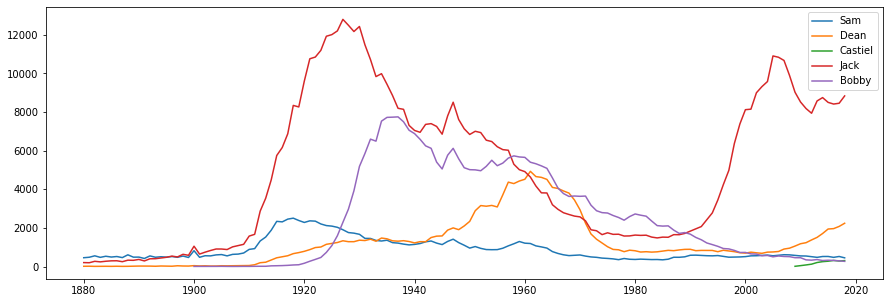

In [11]:
def plotname (sex,name):
    data = allyears_indexed.loc[sex,name]
    pp.plot(data.index,data.values)
    
#Select the size of the plot
pp.figure(figsize=(15,5))

#Select some names for plotting (Supernatural cast name)
names = ['Sam','Dean', 'Castiel', 'Jack','Bobby']

#Call the 'plotname' function for each name in above list.
for name in names:
	plotname('M',name)
pp.legend(names)
pp.show()

Let’s do the same for Females names

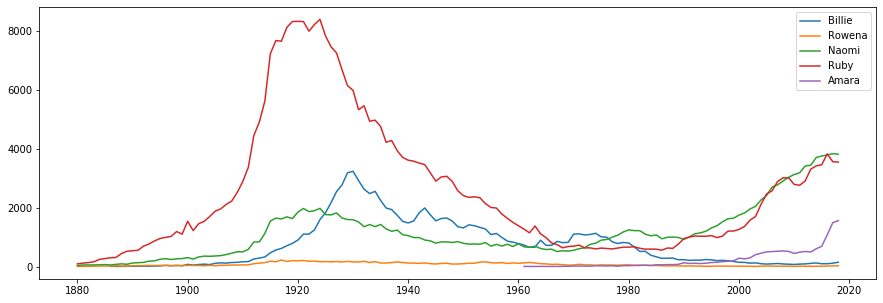

In [12]:
#Select the size of the plot
pp.figure(figsize=(15,5))

#Select some names for plotting.
names = ['Billie','Rowena','Naomi','Ruby','Amara']

#Call the 'plotname' function for each name in above list.
for name in names:
    plotname('F',name)
pp.legend(names)
pp.show()

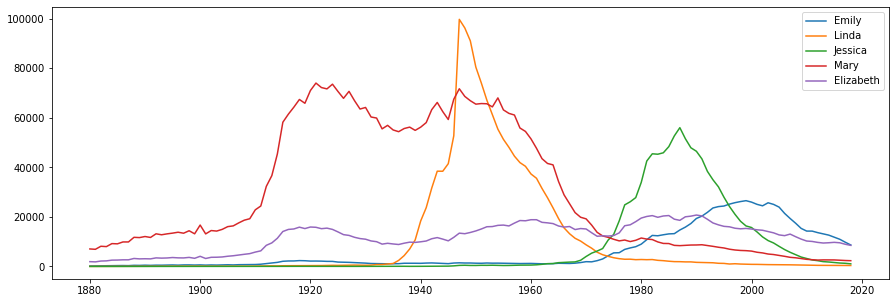

In [13]:
pp.figure(figsize=(15,5))
names = ['Emily','Linda','Jessica','Mary', 'Elizabeth']
for name in names:
    plotname('F',name)
pp.legend(names)
pp.show()


## STEP #4: Extract the 5 most popular names of Males and Females by year

We have already indexed our DataFrame so we can select the data for any year. For example, we will sort the data for the year 2018 in descending order to check the most popular Males name.

In [14]:
allyears_indexed.loc['M',:,2018].sort_values('number',ascending=False).head()

number
sex name    year        
M   Liam    2018   19837
    Noah    2018   18267
    William 2018   14516
    James   2018   13525
    Oliver  2018   13389

We have sorted the year 2018 data in the above exercise but we are interested in ‘name’ column only. So, we will drop the rest three columns and reset the index.

In [15]:
#Create a new DataFrame after sorting.
pop2018 = allyears_indexed.loc['M',:,2018].sort_values('number',ascending=False)

#Use 'drop' method to delete columns and 'reset_index' to reset the index.
pop2018.reset_index().drop(['sex','year','number'],axis=1).head()

,name
0,Liam
1,Noah
2,William
3,James
4,Oliver


Now we will do the same for all the years. For efficient code, we will write two functions, one is to repeat this task for every year and second is for the definite period (10 years).

In [16]:
#Function 1 to sort, drop and reset the index for single year.
def sort_yearly(sex,year):
	simple = allyears_indexed.loc[sex,:,year].sort_values('number',ascending=False).reset_index()
	simple = simple.drop(['sex','year','number'],axis=1).head(10)
	simple.columns = [year]
	simple.index = simple.index + 1
	return simple

In [17]:
#Function 2 to call the 'sort_yearly' for definite range say 10 years.
def sort_definite(sex,year0,year1):
	years = [sort_yearly(sex,year) for year in range(year0,year1+1)]
	return years[0].join(years[1:])

#Now call the 'sort_definite' function for the year 2008 to 2018.
print(sort_definite('M',2008,2018))

           2008         2009       2010       2011       2012       2013  \
1         Jacob        Jacob      Jacob      Jacob      Jacob       Noah   
2       Michael        Ethan      Ethan      Mason      Mason      Jacob   
3         Ethan      Michael    Michael    William      Ethan       Liam   
4        Joshua    Alexander     Jayden     Jayden       Noah      Mason   
5        Daniel      William    William       Noah    William    William   
6     Alexander       Joshua  Alexander    Michael       Liam      Ethan   
7       Anthony       Daniel       Noah      Ethan    Michael    Michael   
8       William       Jayden     Daniel  Alexander     Jayden  Alexander   
9   Christopher         Noah      Aiden      Aiden  Alexander     Jayden   
10      Matthew  Christopher    Anthony     Daniel      Aiden     Daniel   

         2014       2015      2016      2017      2018  
1        Noah       Noah      Noah      Liam      Liam  
2        Liam       Liam      Liam      Noah     

### 5 Most popular name for Males

Now we will stack our records and count the total values to check what are the names for Males on top 5 in last Decade (2008 and 2018).

In [18]:
popularM = sort_definite('M',2008,2018).stack().value_counts().index[:5]
print(popularM)

Index(['William', 'Noah', 'Jacob', 'Michael', 'Ethan'], dtype='object')


We will do same for Two Decade (1988 and 2018).

In [19]:
popularM = sort_definite('M',1988,2018).stack().value_counts().index[:5]
print(popularM)

Index(['Michael', 'Jacob', 'Daniel', 'Joshua', 'Christopher'], dtype='object')


#### 5 Most popular names of Males as per whole date available from year 1880 to 2018.

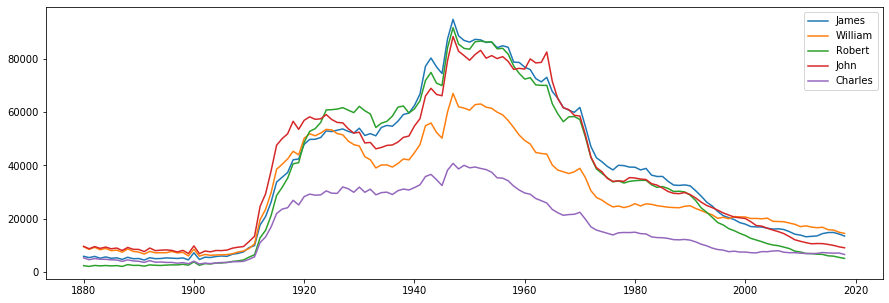

In [20]:
popularM = sort_definite('M',1880,2018).stack().value_counts().index[:5]
pp.figure(figsize=(15,5))
#Call the 'plotname' function for each name in above list.
for nameM in popularM:
    plotname('M',nameM)
pp.legend(popularM)
pp.show()

### 5 Most popular name of Females

Now we will same for the names for Ladies on top 5 in last Decade (2008 and 2018).

In [21]:
popularF = sort_definite('F',2008,2018).stack().value_counts().index[:5]
print(popularF)

Index(['Isabella', 'Olivia', 'Ava', 'Sophia', 'Emma'], dtype='object')


We will do same for Two Decade (1988 and 2018).

In [22]:
popularF = sort_definite('F',1988,2018).stack().value_counts().index[:5]
print(popularF)

Index(['Emily', 'Elizabeth', 'Samantha', 'Olivia', 'Madison'], dtype='object')


#### 5 Most popular names of Females as per whole date available from year 1880 to 2018.

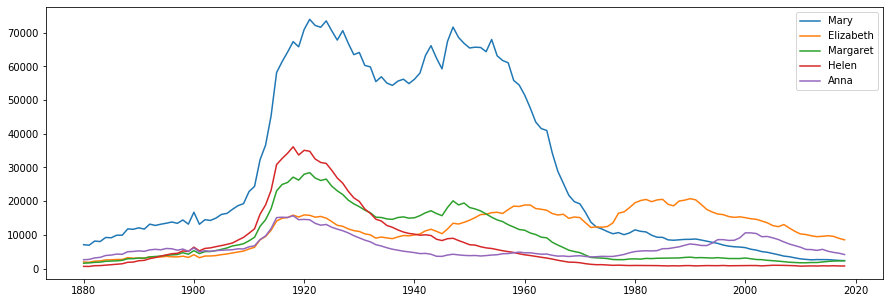

In [23]:
popularF = sort_definite('F',1880,2018).stack().value_counts().index[:5]
pp.figure(figsize=(15,5))
#Call the 'plotname' function for each name in above list.
for nameF in popularF:
    plotname('F',nameF)
pp.legend(popularF)
pp.show()

# End of this case study. 

## Every problem doesn't need to be solve through ML or AI algorithms.